# Gradiente Descendente (*Gradient Descent*)

- O que é gradiente descendente e como funciona
- Como treinar regressão linear usando gradiente descendente
- Qual é o coeficiente de determinação
- Como a dependência linear de *features* afeta a construção de regressão linear

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.linalg import norm
%matplotlib inline

Em um problema de regressão linear, presumimos que a variável alvo (*target*) pode ser aproximada por uma função linear dos dados, ou seja,

$$ 
\hat{y} = \theta_0 x_{0} + \theta_1 x_{1} + \ldots + \theta_n x_n = \langle \theta^T, x\rangle
$$

Na expressão acima:
- $\langle \cdot, \cdot \rangle$ é o produto escalar.
- $\theta_i$ é o peso da $i$-ésima característica no modelo de regressão linear.
- $\theta = (\theta_0, \ldots, \theta_n)$ - vetor de parâmetros.
- $x_j$ - valor da $j$-ésima característica na entrada $x$

Uma maneira comum de treinar um modelo de regressão linear é o método dos mínimos quadrados. Este método minimiza a função de perda quadrada:

$$ 
J(\theta) = \sum_{i = 1}^m \left(\theta^T x^{(i)} - y^{(i)}\right)^2 $$

Aqui $m$ é o número de elementos no conjunto de treinamento.

Há uma fórmula explícita para computar o vetor de pesos que resolve o problema de minimização de forma analítica:

$$ 
\theta = (X^T X)^ {-1} X^T y, 
$$
onde $X$ é a matriz de de dados (objetos por linhas, características por colunas), $y$ é um vetor de respostas corretas. Esta fórmula é muito útil para análises teóricas, mas tem algumas limitações:

1. Usa uma operação "cara" - inversão uma matriz de tamanho $n \times n$, onde $d$ é o número de recursos. São necessárias $O(n^3)$ operações. Se $n$ for grande, pode ser bem lento.

2. Esta fórmula é derivada sob a suposição de uma função de custo quadrática. Se quisermos usar uma função de custo diferente, a equação normal não pode ser usada (e nem sempre é possível derivar uma fórmula explícita que funcione).

Em vez de usar uma fórmula explícita, outra abordagem pode ser proposta - minimizar $J$ usando algum método iterativo. O mais simples deles é o método de descida do gradiente (*gradiente descent*).

# Gradiente descendente

Considere a função $ f (x, y) = x ^ 2 + 10 y ^ 2 $. Seu gradiente é o vetor a seguir.

$$
\nabla f(x, y) = \frac {\partial f(x, y)} {\partial (x, y)} = (2x, 20y)
$$. 

O vetor gradiente aponta na direção de crescimento mais rápido da função, ou seja, responde à pergunta "para onde vamos se estamos no ponto $ (x, y) $ e queremos aumentar o valor da função o mais rápido possível". Para diminuir o valor da função, você precisa ir na direção oposta. Nesse sentido, podemos usar o seguinte algoritmo para encontrar o mínimo da função $f$:

1. Pegue qualquer ponto $(x_0, y_0)$. Vamos calcular o gradiente neste ponto.

2. Para cada $ i = 1, \ldots$, coloque: $ (x_ {i + 1}, y_{i + 1}) = (x_i, y_i) - \eta \nabla f (x_i, y_i)$, onde $ \eta$ - algum número (pequeno).

3. Continuaremos a calcular o próximo ponto $(x_i, y_i)$ até estarmos perto o suficiente do mínimo - por exemplo, até que o gradiente seja muito pequeno.

In [2]:
def f(u):
    ''' 
    u: np.array
    u [0] é o ponto x
    u [1] é o ponto y
    número de saída f (x, y)
    '''
    return u[0] ** 2 + 10 * u[1] ** 2

def Df(u):
    '''
    u [0] é o ponto x
    u [1] é o ponto y
    gradiente de saída - vetor Df_x, Df_y
    '''
    return np.array([2*u[0], 20 * u[1]])

In [3]:
def gradient_descent_simple(f, Df, alpha=0.01, steps=20000, initial_point=(-3, 3), 
                            precision=1e-10, xmin=-4, xmax=4, ymin=-3, 
                            ymax=3, allpoints=False):
    
    
    u_prev = np.array(initial_point)

    X = np.linspace(xmin, xmax, 100)
    Y = np.linspace(ymin, ymax, 100)
    plt.figure(figsize=(6, 6))
    plt.contour(X, Y, [[f(np.array([x, y])) for x in X] for y in Y], 100)

    points = []
    for i in range(steps):
        points.append(u_prev)
        u_new = u_prev - alpha * Df(u_prev)

        if norm(u_new - u_prev) < precision:
            break

        u_prev = u_new


    plt.plot([p[0] for p in points], [p[1] for p in points], 'o-')
    if allpoints:
        return points
    return points[-1]

array([-4.94792403e-09,  2.95255661e-97])

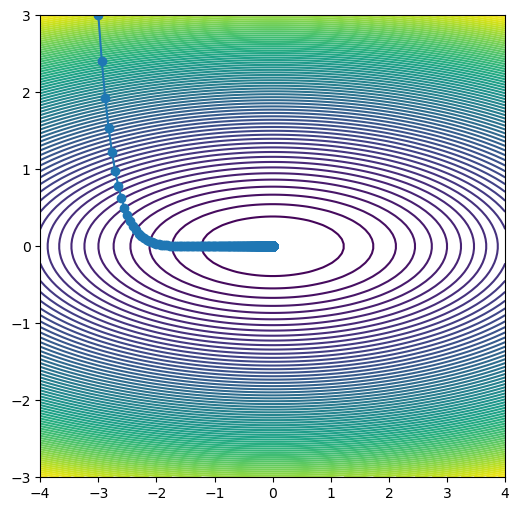

In [4]:
gradient_descent_simple(f=f, Df=Df)

Se tomarmos $\alpha$ muito grande, pode não haver convergência:

array([-1.e-323, -3.e+000])

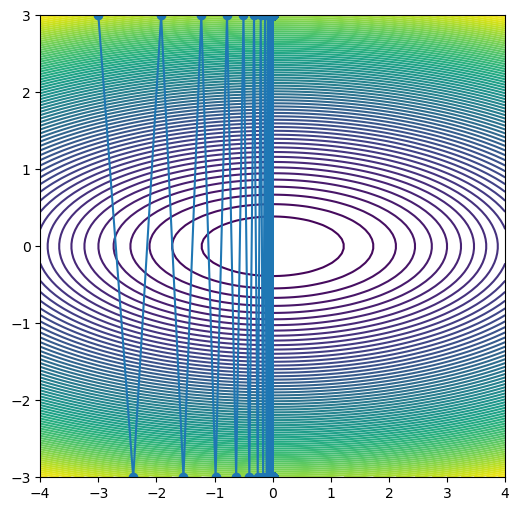

In [5]:
gradient_descent_simple(f=f, Df=Df, alpha=0.1)

E se $\alpha$ for muito pequeno, podemos não atingir o mínimo.

array([-2.99988001,  2.9988003 ])

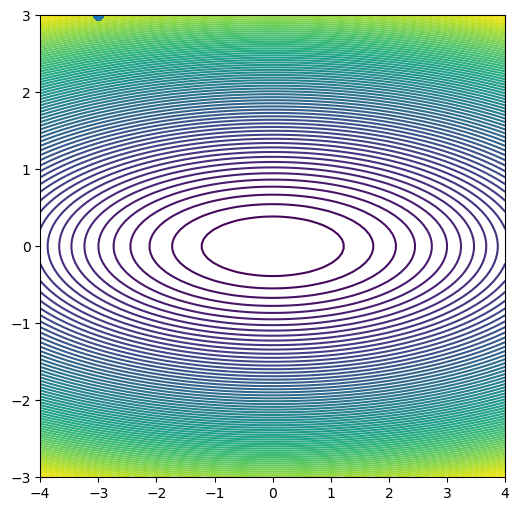

In [6]:
gradient_descent_simple(f=f, Df=Df, alpha=1e-9)

Vamos considerar uma função mais complicada chamada função [Rosenbrock](https://en.wikipedia.org/wiki/Rosenbrock_function).

In [7]:
def rosenbrock(u):
    return ((1 - u[0]) ** 2
            + 100 * (u[1] - u[0] ** 2) ** 2)
def Drosenbrock(u):
    return (np.array([-2 * (1 - u[0]) 
                      - 100 * 2 * (u[1] - u[0] ** 2) * 2 * u[0], 
                      100 * 2 * (u[1] - u[0] ** 2)]))

array([-0.40888058,  0.17412667])

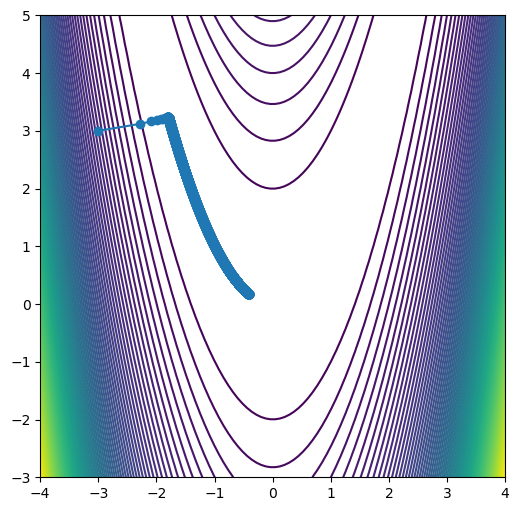

In [8]:
gradient_descent_simple(f=rosenbrock, Df=Drosenbrock,
                        initial_point=(-3, 3), 
                        alpha=0.0001, ymax=5)

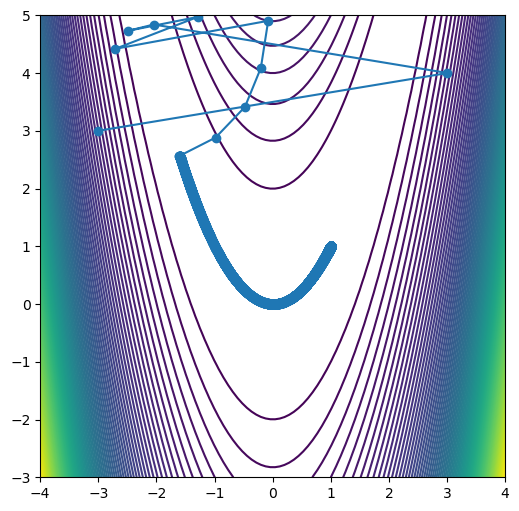

In [9]:
points = gradient_descent_simple(f=rosenbrock, Df=Drosenbrock, 
                                 initial_point=(-3, 3), alpha=0.001 / 1.2, 
                                 ymax=5, allpoints=True)

## Exercício

Encontre o gradiente da função de custo quadrática e implemente a descida do gradiente para o problema do modelo.

Seja a dependência ideal definida como segue: $y = kx + b$

Defina
- k = 2
- b = 3

Vamos adicionar algum ruído da distribuição normal aos dados e tentar restaurar os parâmetros $ w = (k, b) $

Para fazer isso, precisamos saber o gradiente para a função de perda quadrática.

Vamos pintar o gradiente para um caso unidimensional. A conclusão geral pode ser vista nas notas de aula.

In [10]:
# gerar uma seleção:
from numpy.random import normal

n = 100

# gerou n exemplos x da distribuição normal
x = normal(size=n)

# gera dependência com ruído adicionado
y = 2 * x + 3 + normal(size=n)

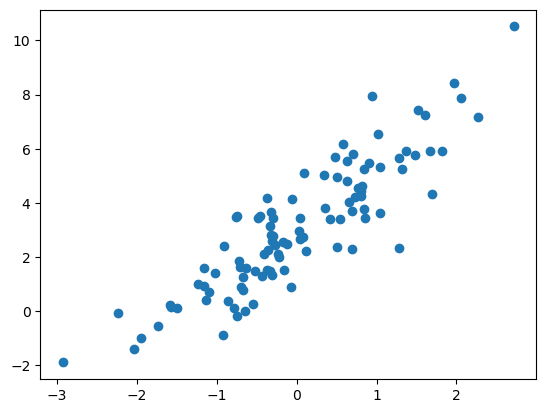

In [11]:

# vamos ver que tipo de dados temos
plt.plot(x, y, 'o')
plt.show()

Adicionando um membro grátis

Como nossa regressão tem uma interceptação, precisamos atribuir uma coluna de todos os uns à matriz $X$. Neste caso, utilizamos a função np.ones_like (), que gera um objeto com as mesmas dimensões de seu argumento, preenchido com uns. Nesse caso, pedimos para fazer um vetor com o mesmo comprimento de $ x $, mas preenchido com valore iguais a 1. A função `np.array` neste caso cria uma matriz a partir de uma lista de listas, supondo que seja escrita linha por linha; para escrever coluna por coluna, aplicamos a transposição.

In [12]:
X = np.array([x, np.ones_like(x)]).T

In [13]:
# agora vamos dar uma olhada nos primeiros 5 exemplos
X[:5]

array([[ 1.01284428,  1.        ],
       [ 0.08025154,  1.        ],
       [-0.75496995,  1.        ],
       [ 0.34972741,  1.        ],
       [ 0.50455396,  1.        ]])

Vamos escrever a função de perda quadrática e seu gradiente.

In [14]:
def J(w):
    '''
    w: np.matriz de comprimento 2
    w [0] o peso do primeiro recurso para X
    w [1] peso de recurso gratuito
    X e y são variáveis ​​globais
    na saída, o número Q (w; x, y)
    '''
    # your code here

In [15]:
def DJ(w):
    '''
    w: np.matriz de comprimento 2
    w [0] o peso do primeiro recurso para X
    w [1] peso de recurso gratuito
    X e y são variáveis ​​globais
    gradiente de saída - vetor [dQ_w1, dQ_w2]
    '''
    # your code here

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

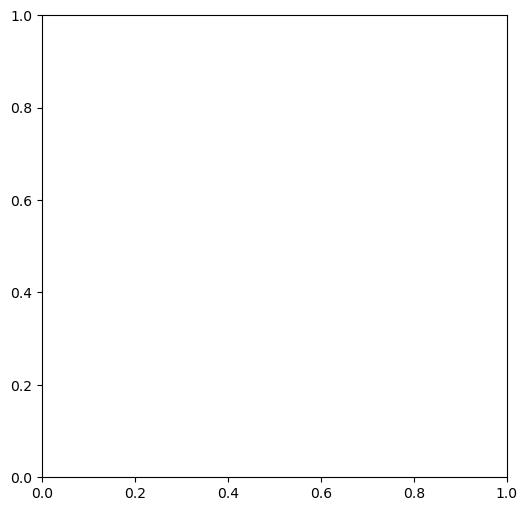

In [16]:
gradient_descent_simple(f=J, Df=DJ, xmin=1, xmax=3, ymin=1, ymax=4, 
                        initial_point=(1, 1), alpha=0.001)

Como você pode ver, o resultado é semelhante aos valores reais de $ k $ e $ b $.

# Regressão linear fora da caixa
Vamos usar a maneira mais simples de construir uma regressão usando modelos prontos do sklearn. Ao executar a regressão fora da caixa, você precisa ler o que está dentro.

In [ ]:

import numpy as np
import pandas as pd
# Carregue o conjunto de dados

# Source: https://archive.ics.uci.edu/ml/machine-learning-databases/communities/
# Redmond, M. A. and A. Baveja: A Data-Driven Software Tool for Enabling Cooperative 
# Information Sharing Among Police Departments. European Journal of Operational Research 
# 141 (2002) 660-678. 

try:
    dataframe = pd.read_csv('communities.csv')    
except:
    dataframe = pd.read_csv('https://raw.githubusercontent.com/ischurov/math-ml-hse-2021-public/master/sem04_linreg/communities.csv')


# Separe o vetor y em uma variável separada
y = pd.DataFrame(dataframe['ViolentCrimesPerPop'])

x = dataframe.drop(['ViolentCrimesPerPop'], 1)
colnames = x.columns

HTTPError: ignored

In [ ]:
# Preencha todas as lacunas nos dados com os valores médios de cada recurso
from sklearn import impute
mis_replacer = impute.SimpleImputer(strategy="mean")
data = mis_replacer.fit_transform(x)
x = pd.DataFrame(data, columns=colnames)

Também dividiremos inicialmente nossos dados pela metade e, por enquanto, trabalharemos apenas com a metade:

In [ ]:
x_tr, y_tr = x.iloc[:int(x.shape[0]/2)], y.iloc[:int(x.shape[0]/2)]
x_test, y_test = x.iloc[int(x.shape[0]/2)+1:], y.iloc[int(x.shape[0]/2)+1:]

In [ ]:
# Importar classe do sklearn
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# construir a regressão diretamente
lr.fit(x_tr,y_tr)


Notamos imediatamente que, por padrão, uma constante será incluída no número de regressores. Usando os métodos da classe, a partir de nossa regressão construída, podemos obter o vetor de pesos $ w $:

In [ ]:
w = lr.coef_[0]
w = pd.DataFrame({'Имя признака':colnames,'Вес признака':w},
                 columns=['Имя признака','Вес признака'])
w[:10]

Vamos construir uma previsão de $ a $ com base em nosso modelo:

In [ ]:
a = lr.predict(x_tr)
a = pd.DataFrame(a, columns=['prediction'])
# previsão para os primeiros objetos
a.head()

Quando é necessário comparar a qualidade de dois modelos lineares diferentes, o mais utilizado para isso é a métrica $ R ^ 2 $. A principal vantagem dessa métrica é que seu valor pode ser interpretado. $ R ^ 2 $ é, com algumas ressalvas, a proporção da variância explicada pelo modelo na variância total da variável-alvo. Este indicador assume valores na faixa de 0 a 1. Quanto maior for, melhor o modelo construído prevê o comportamento da variável de destino.

$$ 
R^2 = 1 - \frac{\sum_i (y_i - a (x_i))^2} {\sum_i (y_i - \overline{y}_i)^2} \approx 1 - \frac{\text{Var}(Y | X)}{\text{Var Y}} 
$$
Agora vamos calcular $ R ^ 2 $ para a regressão que construímos:

In [ ]:
# primeira maneira
print('Primeira forma: %f' %lr.score(x_tr,y_tr))
# segunda maneira
import sklearn.metrics as metrics
print('Segunda forma: %f' %metrics.r2_score(y_tr,a))

70% da variância explicada da variável-alvo. Muito ou pouco depende da tarefa específica e de nossas expectativas subjetivas. Se quase não houver padrões em nossa estrutura de dados e tudo estiver sujeito a eventos aleatórios, nenhum modelo pode nos dar $ R ^ 2 $ alto. Nesse caso, 15% seria um bom resultado.

# Validação - verificação da capacidade de generalização
$ R ^ 2 $, que é mostrado acima, foi calculado sobre os dados sobre os quais a regressão foi construída. Mas queremos que o modelo construído lide com sucesso com previsões sobre dados para os quais ele não conhece o verdadeiro valor da variável de destino, caso contrário, o uso prático de tal modelo será pequeno. Se um modelo é capaz de identificar quaisquer padrões nos dados e generalizá-los para dados que não foram usados ​​em sua construção, dizemos que ele tem capacidade de generalização. Chamaremos a verificação de validação da capacidade de generalização. Em última análise, estamos interessados ​​nos $ R ^ 2 $ que o modelo mostrará nos novos dados.

Vamos relembrar a amostra que adiamos e usá-la para testar a capacidade de generalização.

In [ ]:
a_test = lr.predict(x_test)
print('R2 no conjunto de teste: %f' %metrics.r2_score(y_test,a_test))

Rochas subaquáticas
Ops ... algo deu errado ...: $ R ^ 2 $ acabou sendo negativo. Como isso aconteceu? Vamos prestar atenção à fração:

$$ 
R^2 = 1 - \frac{\sum_i (y_i - a (x_i))^2} {\sum_i (y_i - \overline{y}_i)^2} \approx 1 - \frac{\text{Var}(Y | X)}{\text{Var Y}} 
$$

Nele, a variância da variável de destino em nosso modelo é comparada com a variância usual. A variância regular pode ser considerada como a variância condicional da variável de destino no modelo "base", que desenha uma linha horizontal no nível $ \ bar {y} $. Acontece que para regressões que lidam com previsões piores do que a regressão básica, embutidas diretamente na fórmula dessa métrica, $ R ^ 2 $ dá um resultado negativo:

![texto do link](https://camo.githubusercontent.com/506adbe5842b67f6992d134ce4b5653387b48312/68747470733a2f2f7261772e67697468756275736572636f6e74656e742e636f6d2f46696c61746f764172746d2f4d4c5f45636f2d4e45535f323031372f6d61737465722f73656d696e6172732f6d61696e7461696e2f73656d33706963747572652e706e67)


Assim, tendo decidido validar, percebemos imediatamente que em uma nova amostra, nosso modelo é pior do que nenhum modelo (a previsão $ a (.) = \ Bar {y} $ não requer $ x $ para construir) . Portanto, a capacidade de generalização de nosso modelo é zero. Felizmente, o problema pode ser corrigido. Vejamos o vetor $ w $ novamente, durante a classificação:

In [ ]:
w.sort_values(by='Вес признака')[:6]

E notamos imediatamente que o primeiro regressor desta lista tem um valor muito pequeno em comparação com os outros. E se prestarmos atenção ao final desta lista, notaremos o irmão gêmeo deste regressor, que tem um valor muito grande e é igual em magnitude a ele!

In [ ]:
w.sort_values(by='Вес признака')[-6:]

Neste momento entendemos qual é o problema. Parece que nossa matriz de objetos de feições tem regressores dependentes lineares. Vejamos a correlação entre eles:

In [ ]:
np.corrcoef(x_tr['PolicPerPop'],x_tr['LemasSwFTPerPop'])[0,1]

A correlação é próxima da unidade. Portanto, nossos dados contêm dois regressores quase idênticos.

O que acontece se você incluir recursos dependentes lineares no modelo? Vamos dar um exemplo. Vamos lidar com um verdadeiro vício:

$$ y_i = 7 + 2p_i + 3q_i + 4r_i, $$
onde o vetor peso verdadeiro tem a forma $ w = (w_0, w_1, w_2, w_3) ^ T = (7,2,3,4) $. Sejam as variáveis ​​$ q_i $ e $ r_i $ sempre as mesmas:

$$ q_i = r_i $$
Então, há um número infinito de combinações de $ w_2 $ e $ w_3 $ que ainda funcionariam para nós. Por exemplo, pegue a combinação  $w*=(7,2,-2000,2007)$:

$$7+2p_i-2000q_i+2007r_i\\7+2p_i-2000q_i+2007q_i\\7+2p_i+7q_i\\7+2p_i+3q_i+4q_i\\7+2p_i+3q_i+4r_i=y_i$$

A correlação é próxima da unidade. Portanto, nossos dados contêm dois regressores quase idênticos.

O que acontece se você incluir recursos dependentes lineares no modelo? Vamos dar um exemplo. Vamos lidar com um verdadeiro vício:

$$ y_i = 7 + 2p_i + 3q_i + 4r_i, $$
onde o vetor peso verdadeiro tem a forma $ w = (w_0, w_1, w_2, w_3) ^ T = (7,2,3,4) $. Sejam as variáveis ​​$ q_i $ e $ r_i $ sempre as mesmas:

$$ q_i = r_i $$
Então, há um número infinito de combinações de $ w_2 $ e $ w_3 $ que ainda funcionariam para nós. Por exemplo, pegue a combinação  $w*=(7,2,-2000,2007)$:

$$
7+2p_i-2000q_i+2007r_i\\7+2p_i-2000q_i+2007q_i\\7+2p_i+7q_i\\7+2p_i+3q_i+4q_i\\7+2p_i+3q_i+4r_i=y_i
$$

In [ ]:
x = x.drop(['LemasSwFTPerPop'],1)
colnames = x.columns

In [ ]:
x_tr, y_tr = x.iloc[:int(x.shape[0]/2)], y.iloc[:int(x.shape[0]/2)]
x_test, y_test = x.iloc[int(x.shape[0]/2)+1:], y.iloc[int(x.shape[0]/2)+1:]

Vamos construir a regressão novamente e descobrir que agora ela adquiriu uma capacidade de generalização:

In [ ]:
lr.fit(x_tr,y_tr)
w = lr.coef_[0]
w = pd.DataFrame({'Имя признака': colnames,
                  'Вес признака': w},
                 columns = ['Имя признака','Вес признака'])

a = lr.predict(x_tr)
a_test = lr.predict(x_test)
print('R2 на обучающей выборке: %f' %metrics.r2_score(y_tr,a))
print('R2 на тестовой выборке: %f' %metrics.r2_score(y_test,a_test))